In [2]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns  #seaborn has nice features. Need to load pyplot with seaborn at the same time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [5]:
df = pd.read_csv('national_accidents_attributes_adjusted.csv')

In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
df.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1


In [7]:
df.describe()

,Severity,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
count,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06
mean,2.222448e+00,6.237918e+01,6.308089e+01,2.955843e+01,9.151159e+00,7.784320e+00,6.405431e-03,4.300181e-01,1.000210e-01,2.837018e-02,8.616128e-03,1.342003e-02,1.827625e-02,2.501538e-03,1.527592e-04,5.907816e-06,1.265961e-05,9.431238e-02,9.056876e-01,1.054959e-01,1.727977e-01
std,5.752754e-01,1.832461e+01,2.293234e+01,1.018704e+00,2.932016e+00,5.185903e+00,1.014427e-01,4.950785e-01,3.850142e-01,1.660281e-01,9.242239e-02,1.150649e-01,1.339487e-01,6.531417e-02,1.235864e-02,2.430594e-03,3.558013e-03,2.922629e-01,2.922629e-01,3.071914e-01,3.780725e-01
min,1.000000e+00,-2.790000e+01,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.100000e+01,4.700000e+01,2.947000e+01,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,6.400000e+01,6.500000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,7.600000e+01,8.200000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,1.184000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.698876e+02,2.400000e+01,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
df.Severity_simple.value_counts()

0    980128
1    204743
Name: Severity_simple, dtype: int64

In [9]:
temp_cat = []
temp_ord = []
for temp in df['Temp_F']:
    if temp <= 32:
        temp_cat.append('freezing')
        temp_ord.append(0)
    elif temp >32 and temp <= 46:
        temp_cat.append('cold')
        temp_ord.append(1)
    elif temp >46 and temp <= 59:
        temp_cat.append('cool')
        temp_ord.append(2)
    elif temp >59 and temp <= 86:
        temp_cat.append('nice')
        temp_ord.append(3)
    elif temp >86 and temp <= 104:
        temp_cat.append('warm')
        temp_ord.append(4)
    elif temp > 104:
        temp_cat.append('hot')
        temp_ord.append(5)

In [10]:
df['Temp_cat'] = temp_cat
df['Temp_ord'] = temp_ord

In [11]:
ws_cat = []
ws_ord = []
for ws in df['Wind_Speed_mph']:
    if ws <= 0:
        ws_cat.append('calm')
        ws_ord.append(0)
    elif ws > 0 and ws <= 12:
        ws_cat.append('light')
        ws_ord.append(1)
    elif ws > 12 and ws <= 24:
        ws_cat.append('moderate')
        ws_ord.append(2)
    elif ws > 24 and ws <= 31:
        ws_cat.append('strong')
        ws_ord.append(3)
    elif ws > 31 and ws <=63:
        ws_cat.append('gale')
        ws_ord.append(4)
    elif ws > 63 and ws <= 75:
        ws_cat.append('storm')
        ws_ord.append(5)
    elif ws > 75:
        ws_cat.append('hurricane')
        ws_ord.append(6)

In [12]:
df['Windspeed_cat'] = ws_cat
df['Windspeed_ord'] = ws_ord

In [13]:
humid_cat = []
humid_ord = []
for humid in df['Humidity_percent']:
    if humid < 25:
        humid_cat.append('low')
        humid_ord.append(0)
    elif humid >= 25 and humid < 30:
        humid_cat.append('low_fair')
        humid_ord.append(1)
    elif humid >= 30 and humid < 60:
        humid_cat.append('normal')
        humid_ord.append(2)
    elif humid >= 60 and humid < 70:
        humid_cat.append('high_fair')
        humid_ord.append(3)
    elif humid >= 70:
        humid_cat.append('high')
        humid_ord.append(4)

In [14]:
df['Humidity_cat'] = humid_cat
df['Humidity_ord'] = humid_ord

In [15]:
pr_cat = []
pr_ord = []
for pr in df['Pressure_in']:
    if pr <= 29.8:
        pr_cat.append('low')
        pr_ord.append(0)
    elif pr >29.8 and pr < 30.2:
        pr_cat.append('normal')
        pr_ord.append(1)
    elif pr >= 30.2:
        pr_cat.append('high')
        pr_ord.append(2)

In [16]:
df['Pressure_cat'] = pr_cat
df['Pressure_ord'] = pr_ord

In [17]:
vis_cat = []
vis_ord = []
for vis in df['Visibility_mi']:
    if vis < 5:
        vis_cat.append('poor')
        vis_ord.append(0)
    elif vis >= 5 and vis < 10:
        vis_cat.append('moderate')
        vis_ord.append(1)
    elif vis >= 10:
        vis_cat.append('good')
        vis_ord.append(2)

In [18]:
df['Visibility_cat'] = vis_cat
df['Visibility_ord'] = vis_ord

#### ***Did not do precipitation range because it is overlapping with 'RAIN','SNOW', etc. In addition, the precipitation range in inch seems really high. Use Texas for example, monthly precipitation is ~0 - 6 inch. The data has many outliers.

In [19]:
catvar = ['Wind_Direction','Sunrise_Sunset']

In [20]:
# One-hot encoding for catvar
X_cat = df[catvar]

from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder(handle_unknown = 'ignore',sparse = False)
X_encoded = my_encoder.fit_transform(X_cat)

In [21]:
X_encoded.shape

(1184871, 20)

In [22]:
print(my_encoder.categories_[0])
X_encoded_cols = (list(my_encoder.categories_[0])+
                 list(my_encoder.categories_[1]))
print(X_encoded_cols)

['CALM' 'E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW'
 'SW' 'VAR' 'W' 'WNW' 'WSW']
['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night']


In [23]:
X_encoded_df = pd.DataFrame(data = X_encoded, columns = X_encoded_cols)

In [24]:
X_encoded_df.head()

,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW,Day,Night
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [25]:
# Add encoded X_cat into df
df2 = pd.concat([df, X_encoded_df], axis  = 1)

In [26]:
df2.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple,Temp_cat,Temp_ord,Windspeed_cat,Windspeed_ord,Humidity_cat,Humidity_ord,Pressure_cat,Pressure_ord,Visibility_cat,Visibility_ord,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW,Day,Night
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1,cold,1,light,1,normal,2,low,0,good,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,cold,1,light,1,high,4,low,0,good,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0,cold,1,light,1,high,4,low,0,good,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0,cold,1,light,1,normal,2,low,0,good,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1,cold,1,light,1,high,4,low,0,good,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [82]:
cat_var = ['Temp_ord', 'Humidity_ord', 'Pressure_ord', 'Visibility_ord',
           'Windspeed_ord', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
           'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
           'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
           'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'SNOW', 'SLEET',
           'DUST', 'TORNADO', 'HAIL', 'Work_day', 'Rush_hour', 'Night']  
#Removed 'Windy' because it overlapped with Windspeed_ord

In [79]:
cat_var

['Temp_ord',
 'Humidity_ord',
 'Pressure_ord',
 'Visibility_ord',
 'Windspeed_ord',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'CLOUDY',
 'RAIN',
 'FOG',
 'THUNDER',
 'SNOW',
 'SLEET',
 'DUST',
 'TORNADO',
 'HAIL',
 'Work_day',
 'Rush_hour',
 'Night']

In [29]:
df2[cat_var].isnull().sum()

Temp_ord           0
Humidity_ord       0
Pressure_ord       0
Visibility_ord     0
Windspeed_ord      0
Amenity            0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
CLOUDY             0
RAIN               0
FOG                0
THUNDER            0
SNOW               0
SLEET              0
DUST               0
TORNADO            0
HAIL               0
Work_day           0
Rush_hour          0
Night              0
dtype: int64

In [30]:
cat_var_full = cat_var
cat_var_full.append('Severity_simple')

In [80]:
cat_var_full

['Temp_ord',
 'Humidity_ord',
 'Pressure_ord',
 'Visibility_ord',
 'Windspeed_ord',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'CLOUDY',
 'RAIN',
 'FOG',
 'THUNDER',
 'SNOW',
 'SLEET',
 'DUST',
 'TORNADO',
 'HAIL',
 'Work_day',
 'Rush_hour',
 'Night']

In [32]:
X_cat = df2[cat_var]

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()  #define scaler_minmax
X_minmax = scaler_minmax.fit_transform(X_cat)

In [36]:
type(X_minmax)

numpy.ndarray

In [37]:
df_minmax = pd.DataFrame(X_minmax, columns = cat_var)

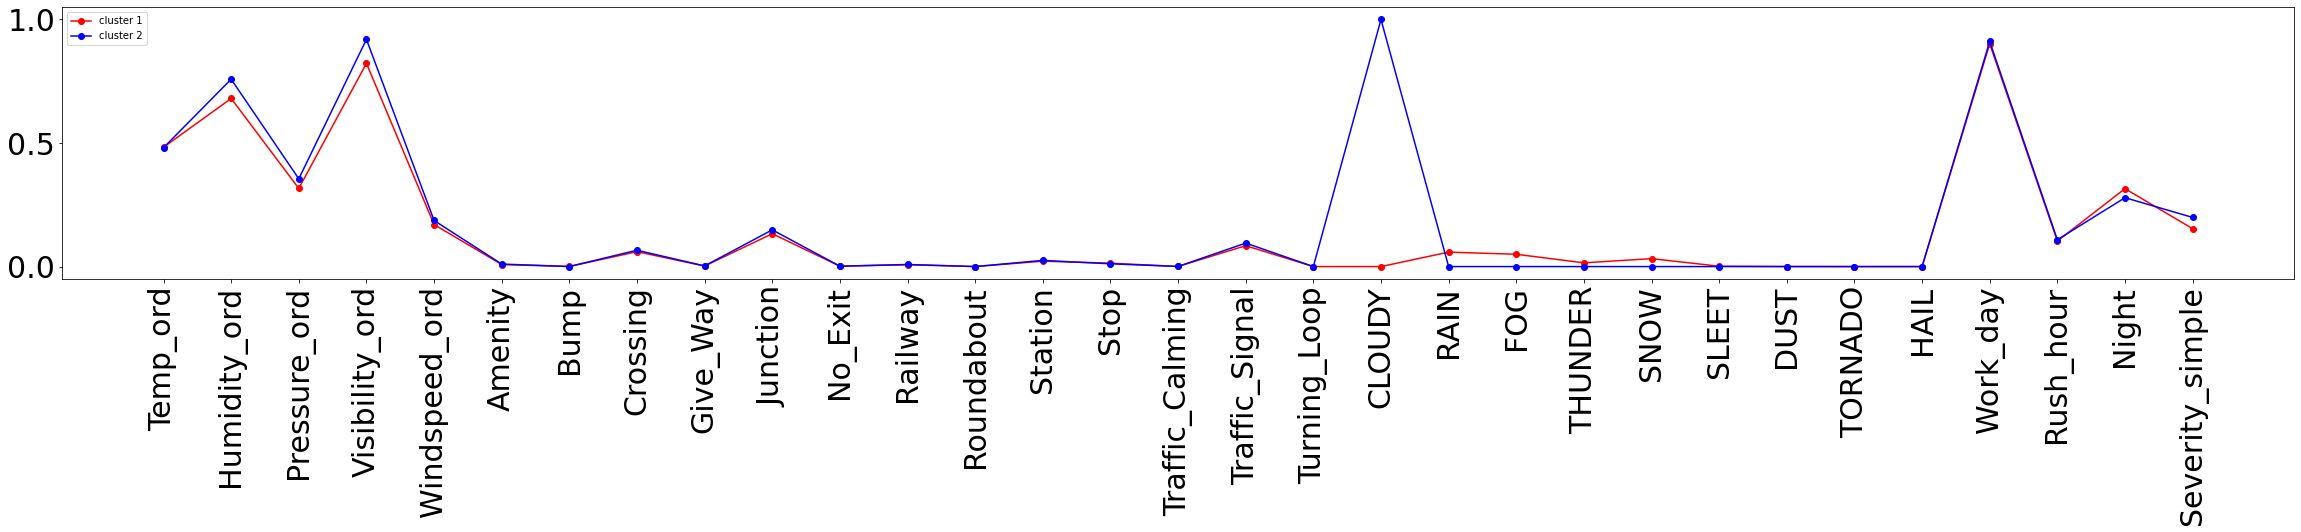

In [91]:
from sklearn.cluster import KMeans

clusters  = 2

kmeans = KMeans(n_clusters=clusters, random_state = 0)
kmeans.fit(X_minmax)

cls_predict = kmeans.predict(X_minmax)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_minmax.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map['Severity_simple'] = df2['Severity_simple']

i = 0
ave_severity = []

while i < clusters:
    cluster = cluster_map[cluster_map['cluster']==i]
    cluster.head()
    ave_sev = cluster.Severity_simple.sum()/cluster.shape[0]
    ave_severity.append(ave_sev)
    i += 1
#print(ave_severity)

#print("Predicted Labels:", cls_predict)
#print("Performance Score:", kmeans.score(X_minmax))
#print("Cluster Centers: \n", kmeans.cluster_centers_)  
plt.figure(figsize = (40,5))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[0,:],ave_severity[0]), '-or', label = 'cluster 1')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[1,:],ave_severity[1]), '-ob', label = 'cluster 2')
#plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[2,:],ave_severity[2]), '-og', label = 'cluster 3')
#plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[3,:],ave_severity[3]), '-oy', label = 'cluster 4')
#plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[4,:],ave_severity[4]), '-o', label = 'cluster 5')
plt.xticks(rotation=90)
leg = plt.legend(loc='upper left')

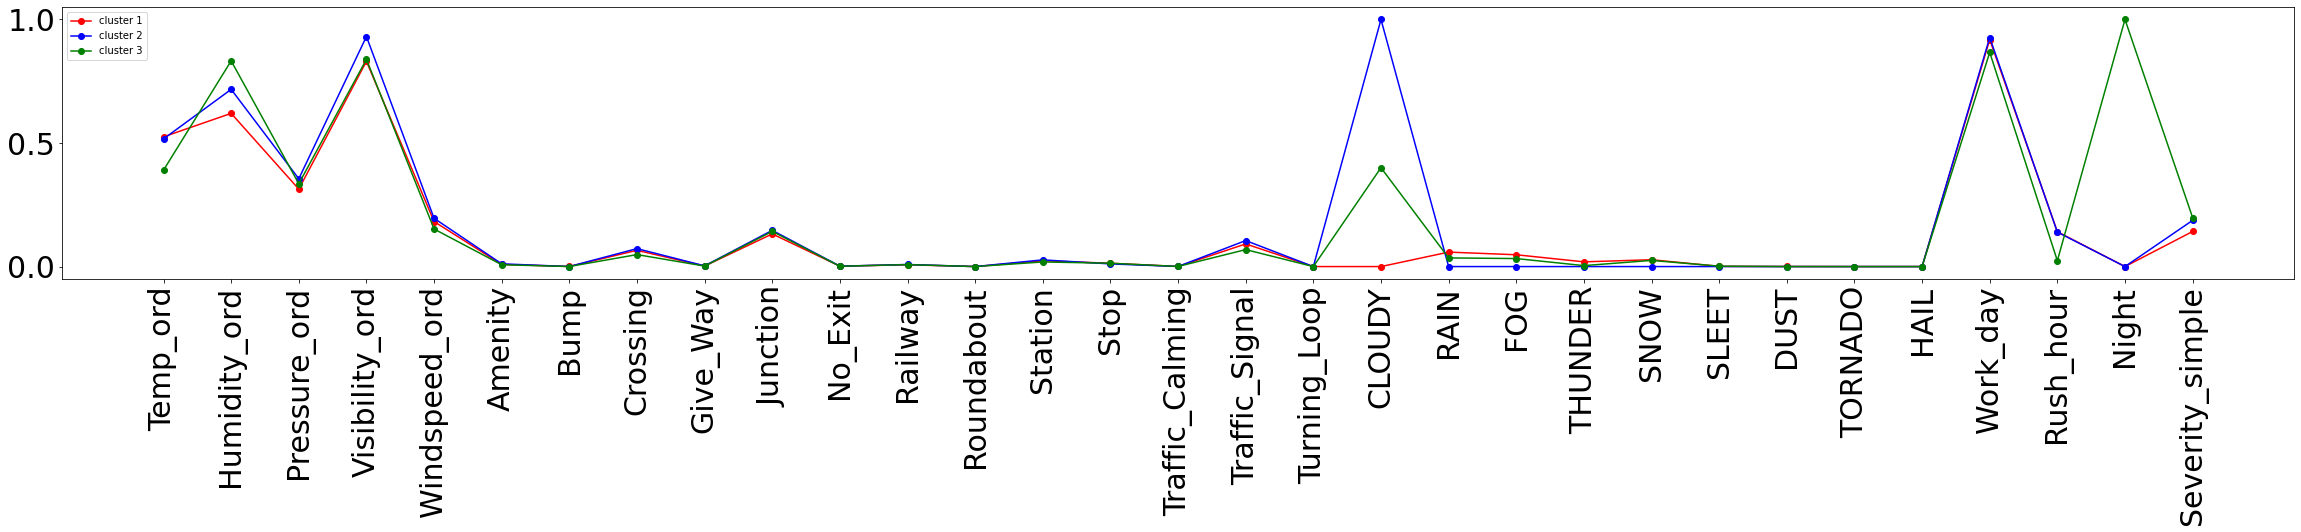

In [93]:
from sklearn.cluster import KMeans

clusters  = 3

kmeans = KMeans(n_clusters=clusters, random_state = 0)
kmeans.fit(X_minmax)

cls_predict = kmeans.predict(X_minmax)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_minmax.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map['Severity_simple'] = df2['Severity_simple']

i = 0
ave_severity = []

while i < clusters:
    cluster = cluster_map[cluster_map['cluster']==i]
    cluster.head()
    ave_sev = cluster.Severity_simple.sum()/cluster.shape[0]
    ave_severity.append(ave_sev)
    i += 1
#print(ave_severity)

#print("Predicted Labels:", cls_predict)
#print("Performance Score:", kmeans.score(X_minmax))
#print("Cluster Centers: \n", kmeans.cluster_centers_)  
plt.figure(figsize = (40,5))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[0,:],ave_severity[0]), '-or', label = 'cluster 1')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[1,:],ave_severity[1]), '-ob', label = 'cluster 2')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[2,:],ave_severity[2]), '-og', label = 'cluster 3')
#plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[3,:],ave_severity[3]), '-oy', label = 'cluster 4')
#plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[4,:],ave_severity[4]), '-o', label = 'cluster 5')
plt.xticks(rotation=90)
leg = plt.legend(loc='upper left')

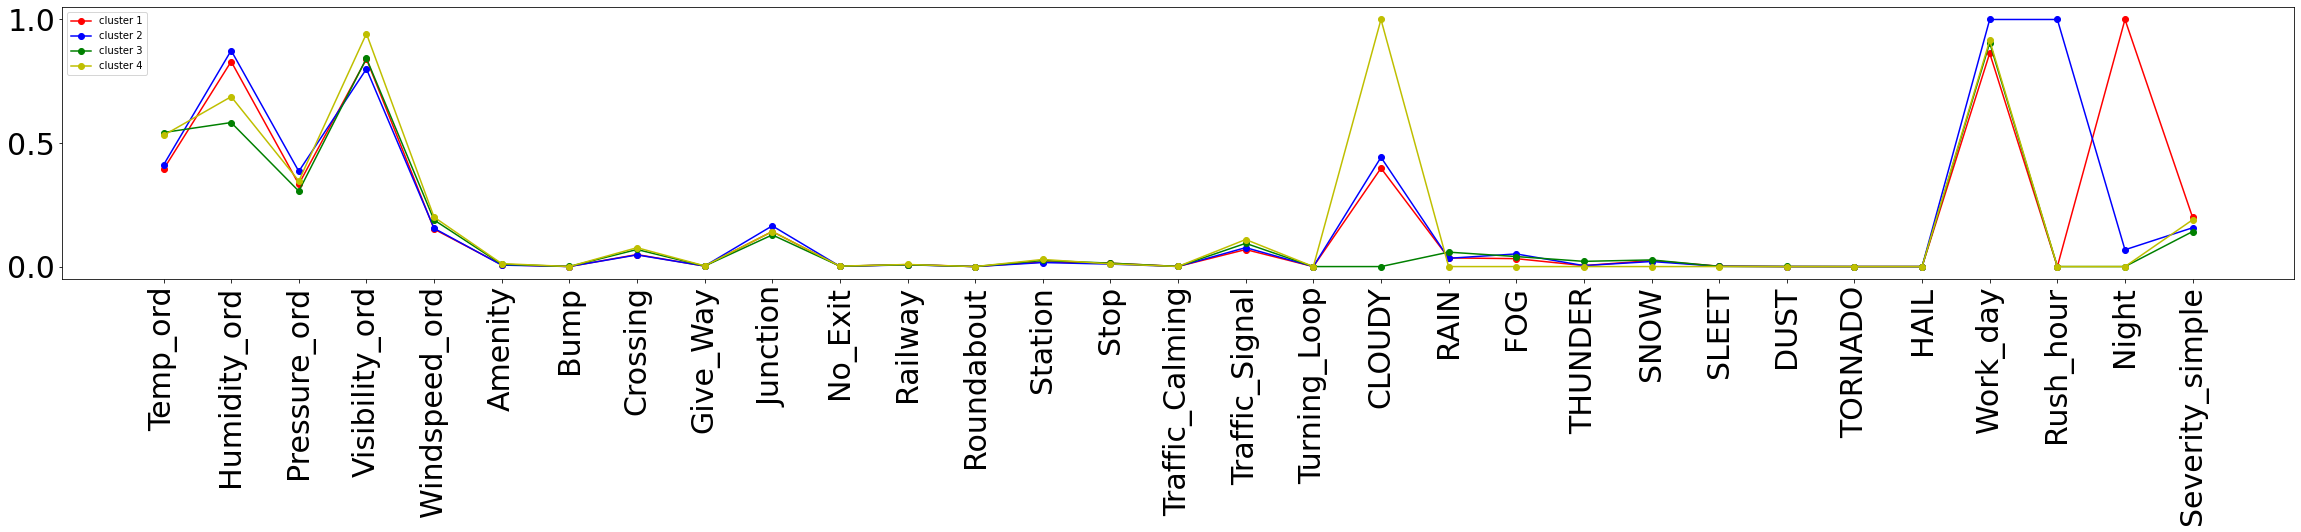

In [96]:
from sklearn.cluster import KMeans

clusters  = 4

kmeans = KMeans(n_clusters=clusters, random_state = 0)
kmeans.fit(X_minmax)

cls_predict = kmeans.predict(X_minmax)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_minmax.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map['Severity_simple'] = df2['Severity_simple']

i = 0
ave_severity = []

while i < clusters:
    cluster = cluster_map[cluster_map['cluster']==i]
    cluster.head()
    ave_sev = cluster.Severity_simple.sum()/cluster.shape[0]
    ave_severity.append(ave_sev)
    i += 1
#print(ave_severity)

#print("Predicted Labels:", cls_predict)
#print("Performance Score:", kmeans.score(X_minmax))
#print("Cluster Centers: \n", kmeans.cluster_centers_)  
plt.figure(figsize = (40,5))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[0,:],ave_severity[0]), '-or', label = 'cluster 1')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[1,:],ave_severity[1]), '-ob', label = 'cluster 2')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[2,:],ave_severity[2]), '-og', label = 'cluster 3')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[3,:],ave_severity[3]), '-oy', label = 'cluster 4')
#plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[4,:],ave_severity[4]), '-o', label = 'cluster 5')
plt.xticks(rotation=90)
leg = plt.legend(loc='upper left')

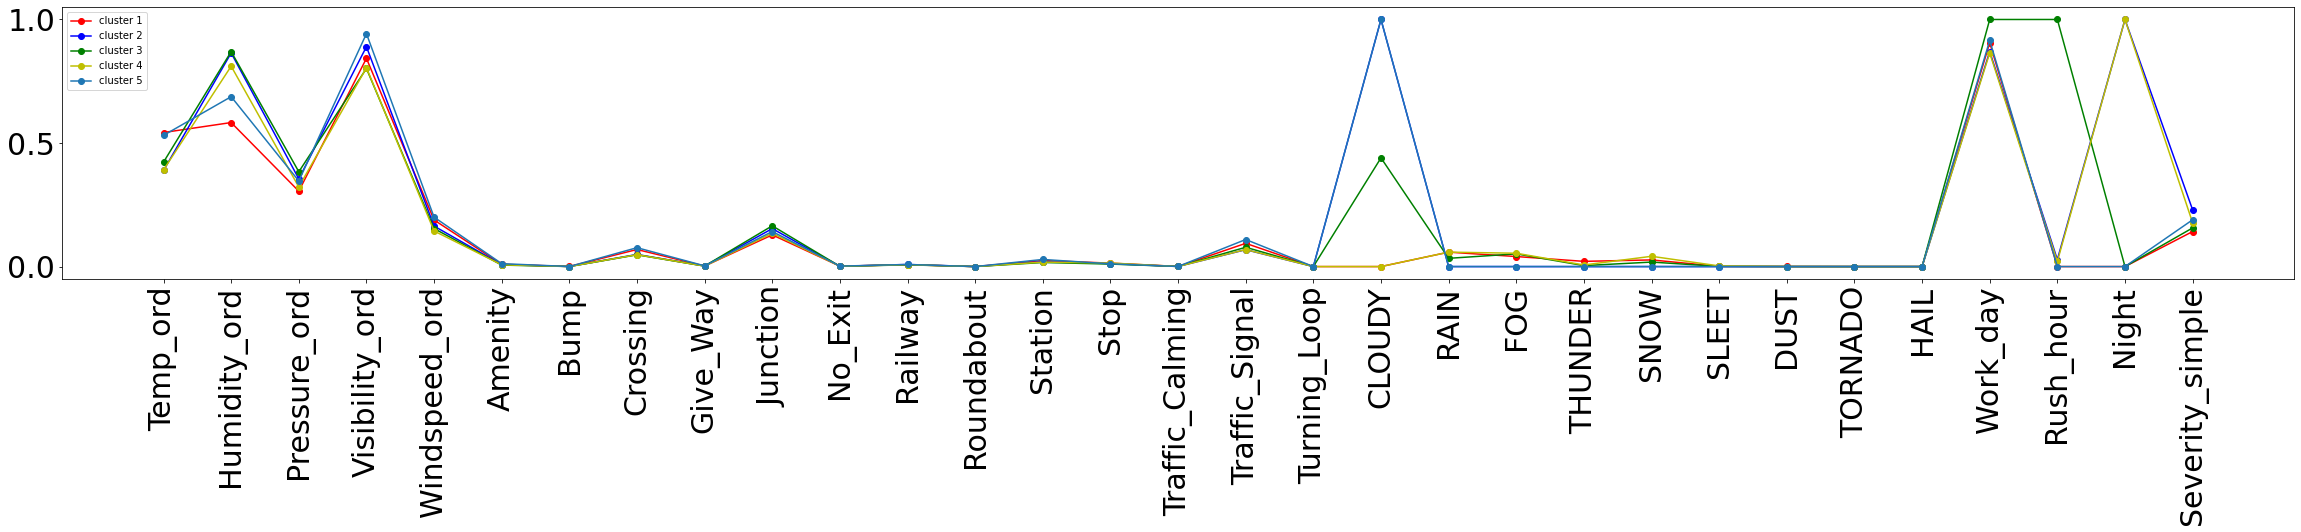

In [97]:
from sklearn.cluster import KMeans

clusters  = 5

kmeans = KMeans(n_clusters=clusters, random_state = 0)
kmeans.fit(X_minmax)

cls_predict = kmeans.predict(X_minmax)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_minmax.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map['Severity_simple'] = df2['Severity_simple']

i = 0
ave_severity = []

while i < clusters:
    cluster = cluster_map[cluster_map['cluster']==i]
    cluster.head()
    ave_sev = cluster.Severity_simple.sum()/cluster.shape[0]
    ave_severity.append(ave_sev)
    i += 1
#print(ave_severity)

#print("Predicted Labels:", cls_predict)
#print("Performance Score:", kmeans.score(X_minmax))
#print("Cluster Centers: \n", kmeans.cluster_centers_)  
plt.figure(figsize = (40,5))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[0,:],ave_severity[0]), '-or', label = 'cluster 1')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[1,:],ave_severity[1]), '-ob', label = 'cluster 2')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[2,:],ave_severity[2]), '-og', label = 'cluster 3')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[3,:],ave_severity[3]), '-oy', label = 'cluster 4')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[4,:],ave_severity[4]), '-o', label = 'cluster 5')
plt.xticks(rotation=90)
leg = plt.legend(loc='upper left')

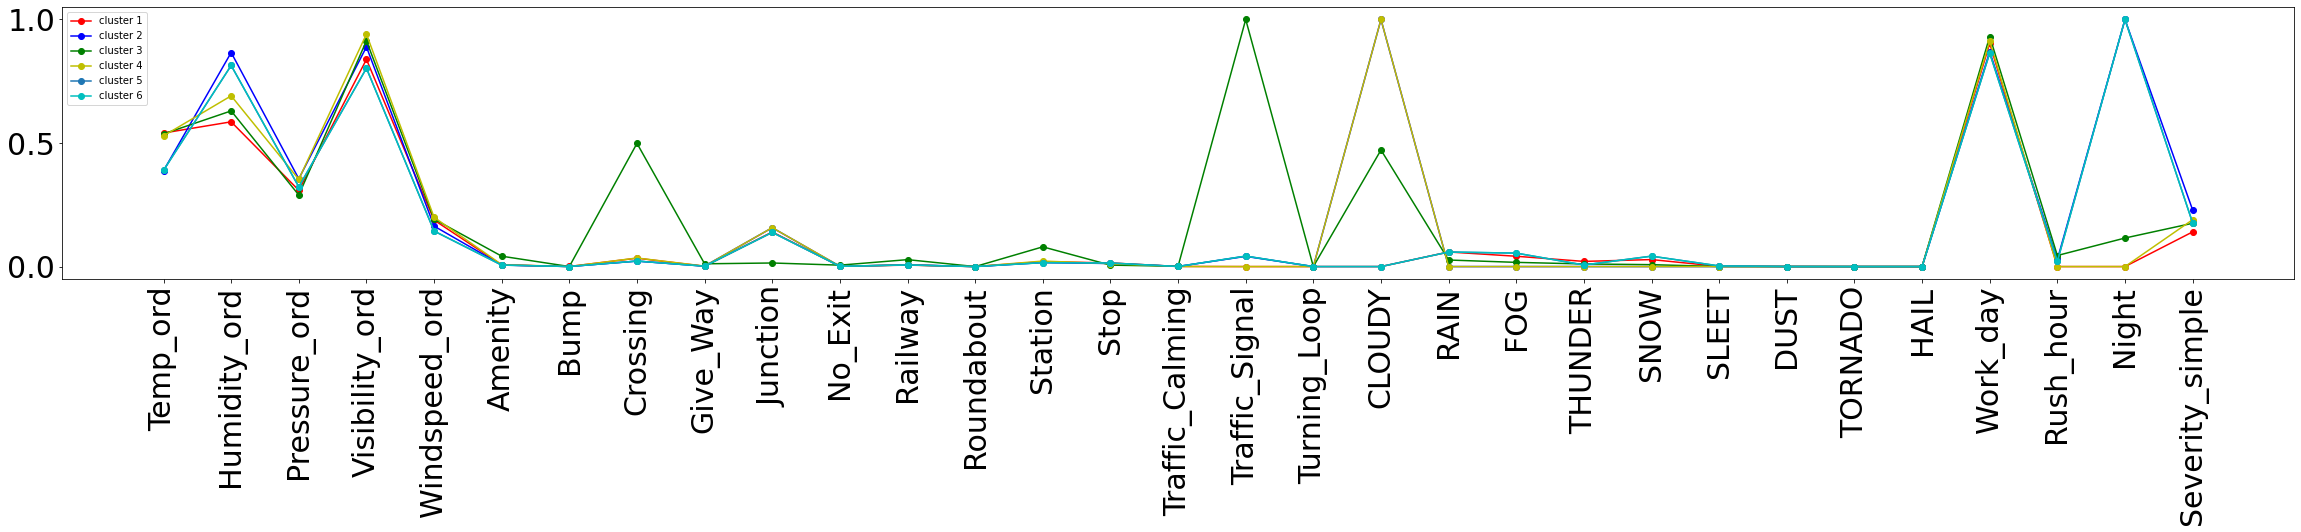

In [100]:
from sklearn.cluster import KMeans

clusters  = 6

kmeans = KMeans(n_clusters=clusters, random_state = 0)
kmeans.fit(X_minmax)

cls_predict = kmeans.predict(X_minmax)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_minmax.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map['Severity_simple'] = df2['Severity_simple']

i = 0
ave_severity = []

while i < clusters:
    cluster = cluster_map[cluster_map['cluster']==i]
    cluster.head()
    ave_sev = cluster.Severity_simple.sum()/cluster.shape[0]
    ave_severity.append(ave_sev)
    i += 1
#print(ave_severity)

#print("Predicted Labels:", cls_predict)
#print("Performance Score:", kmeans.score(X_minmax))
#print("Cluster Centers: \n", kmeans.cluster_centers_)  
plt.figure(figsize = (40,5))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[0,:],ave_severity[0]), '-or', label = 'cluster 1')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[1,:],ave_severity[1]), '-ob', label = 'cluster 2')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[2,:],ave_severity[2]), '-og', label = 'cluster 3')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[3,:],ave_severity[3]), '-oy', label = 'cluster 4')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[4,:],ave_severity[4]), '-o', label = 'cluster 5')
plt.plot(cat_var_full, np.append(kmeans.cluster_centers_[4,:],ave_severity[4]), '-oc', label = 'cluster 6')
plt.xticks(rotation=90)
leg = plt.legend(loc='upper left')